In [24]:
import pandas as pd
import numpy as np
import geopandas as gpd #conda install geopandas
import matplotlib.pyplot as plt
import folium 
from shapely.ops import nearest_points
from shapely.geometry import LineString, Point, box
from pyproj import Proj

In [25]:
PATH = 'C:/Users/Francisco Sarabia/Downloads/Datasets/'

In [26]:
# https://datos.cdmx.gob.mx/explore/?sort=modified&refine.publisher=Secretar%C3%ADa+de+Movilidad

# Contador ciclistas
#'https://datos.cdmx.gob.mx/explore/dataset/contador-ciclistas/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'

# Intersecciones seguras 
#'https://datos.cdmx.gob.mx/explore/dataset/intersecciones-seguras/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
#'https://datos.cdmx.gob.mx/explore/dataset/intersecciones-seguras/download/?format=shp&timezone=America/Mexico_City&lang=es'

# Afluencia diaria del Metro CDMX
#'https://datos.cdmx.gob.mx/explore/dataset/afluencia-diaria-del-metro-cdmx/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'

# Biciestacionamientos masivos 
#'https://datos.cdmx.gob.mx/explore/dataset/biciestacionamientos-masivos/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
#'https://datos.cdmx.gob.mx/explore/dataset/biciestacionamientos-masivos/download/?format=shp&timezone=America/Mexico_City&lang=es'

# Paradas de RTP
b = 'https://datos.cdmx.gob.mx/explore/dataset/paradas-de-rtp/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
#'https://datos.cdmx.gob.mx/explore/dataset/paradas-de-rtp/download/?format=shp&timezone=America/Mexico_City&lang=es'

# Paradas de Trolebús
c = 'https://datos.cdmx.gob.mx/explore/dataset/paradas-de-trolebus/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
#'https://datos.cdmx.gob.mx/explore/dataset/paradas-de-trolebus/download/?format=shp&timezone=America/Mexico_City&lang=es'

# Líneas de metro 
d = 'https://datos.cdmx.gob.mx/explore/dataset/lineas-de-metro/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
#'https://datos.cdmx.gob.mx/explore/dataset/lineas-de-metro/download/?format=shp&timezone=America/Mexico_City&lang=es'

# Ciclovías 
#'https://datos.cdmx.gob.mx/explore/dataset/ciclovias/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
#'https://datos.cdmx.gob.mx/explore/dataset/ciclovias/download/?format=shp&timezone=America/Mexico_City&lang=es'

# Estaciones, paradas y terminales del sistema de transporte unificado
e = 'https://datos.cdmx.gob.mx/explore/dataset/estaciones-paradas-y-terminales-del-sistema-de-transporte-unificado/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
#'https://datos.cdmx.gob.mx/explore/dataset/estaciones-paradas-y-terminales-del-sistema-de-transporte-unificado/download/?format=shp&timezone=America/Mexico_City&lang=es'

# Pasos Seguros CDMX
#'https://datos.cdmx.gob.mx/explore/dataset/pasos-seguros-cdmx/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
#'https://datos.cdmx.gob.mx/explore/dataset/pasos-seguros-cdmx/download/?format=shp&timezone=America/Mexico_City&lang=es'

# Rutas y corredores del transporte público concesionado 
#'https://datos.cdmx.gob.mx/explore/dataset/rutas-y-corredores-del-transporte-publico-concesionado/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
#'https://datos.cdmx.gob.mx/explore/dataset/rutas-y-corredores-del-transporte-publico-concesionado/download/?format=shp&timezone=America/Mexico_City&lang=es'

# Afluencia preliminar en transporte público 
#'https://datos.cdmx.gob.mx/explore/dataset/afluencia-preliminar-en-transporte-publico/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'

In [148]:
# Capacidad hospitalaria ZMVM
f = 'https://datos.cdmx.gob.mx/explore/dataset/capacidad-hospitalaria/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
#'https://datos.cdmx.gob.mx/explore/dataset/capacidad-hospitalaria/download/?format=geojson&timezone=America/Mexico_City&lang=es'

# Hospitales COVID-19
g = 'https://datos.cdmx.gob.mx/explore/dataset/hospitales-covid-19/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
#'https://datos.cdmx.gob.mx/explore/dataset/hospitales-covid-19/download/?format=shp&timezone=America/Mexico_City&lang=es'

# Personas hospitalizadas por día por COVID-19 
h = 'https://datos.cdmx.gob.mx/explore/dataset/personas-hospitalizadas-covid19/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'

# Casos a nivel nacional asociados a covid-19 
i = 'https://datos.cdmx.gob.mx/explore/dataset/casos-asociados-a-covid-19/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
#'https://datos.cdmx.gob.mx/explore/dataset/casos-asociados-a-covid-19/download/?format=geojson&timezone=America/Mexico_City&lang=es'

# Traslados a hospitales 
# 'https://datos.cdmx.gob.mx/explore/dataset/traslados-a-hospitales/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'

# Hospitales y Centros de Salud 
# 
j = 'https://datos.cdmx.gob.mx/explore/dataset/hospitales-y-centros-de-salud/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
# 'https://datos.cdmx.gob.mx/explore/dataset/hospitales-y-centros-de-salud/download/?format=shp&timezone=America/Mexico_City&lang=es'


# Interrupción legal del embarazo 
#'https://datos.cdmx.gob.mx/explore/dataset/interrupcion-legal-del-embarazo/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'

In [5]:
e

'https://datos.cdmx.gob.mx/explore/dataset/estaciones-paradas-y-terminales-del-sistema-de-transporte-unificado/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'

In [2]:
i

'https://datos.cdmx.gob.mx/explore/dataset/casos-asociados-a-covid-19/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'

In [5]:
#df% = pd.read_csv(%)#.sort_values('fecha', ascending=True)
#df%.head(3)

#df%.dtypes

#type(df%), df%.shape

#df%.to_csv(PATH+'COVID.csv')

#plt.plot(df%['fecha'],df%[['hospitalizados_totales','hospitalizados_totales_cdmx', 'hospitalizados_totales_edomex']])
#plt.show()

## Paradas de RTP

In [27]:
dfB = pd.read_csv(b)#.sort_values('fecha', ascending=True)
#dfB.head(2)

In [33]:
#dfB.dtypes, dfB.shape

In [29]:
dfB.rename(columns=
           {'Geometry': 'geometry',
            'stop_id': 'id',
            'stop_name': 'nombre',
            #'stop_desc' : ,
            'stop_lat': 'lat',
            'stop_lon':'lon',
            'trip_heads': 'ruta',
            #'agency_id',
            #'route_long',
            'geo_point_2d': 'lat,lon'}
          , inplace=True)

In [30]:
#dfB.dtypes, dfB.shape

In [31]:
dfB = dfB[['geometry','nombre','lat','lon','ruta','lat,lon']]

In [32]:
dfB.to_csv(PATH+'ParadasRTP.csv')

## Paradas de Trolebus

In [34]:
dfC = pd.read_csv(c)#.sort_values('fecha', ascending=True)
#dfC.head(3)

In [35]:
#dfC.dtypes, dfC.shape

In [36]:
dfC.rename(columns=
    {'Geometry':'geometry',
     'stop_id':'id',
     #'stop_code':'',
     'stop_name':'name',
     'stop_desc':'parada',
     'stop_lat':'lat',
     'stop_lon':'lon',
     'trip_heads':'ruta',
     #'agency_id':'',
     #'route_long':'',
     'geo_point_2d':'lat,lon'}
     , inplace=True)


In [37]:
dfC = dfC[['geometry',
     'id',
     'name',
     'parada',
     'lat',
     'lon',
     'ruta',
     'lat,lon']]

In [169]:
dfC.dtypes, dfC.shape

(geometry     object
 id          float64
 name         object
 parada       object
 lat         float64
 lon         float64
 ruta         object
 lat,lon      object
 dtype: object, (596, 8))

In [39]:
dfC.to_csv(PATH+'ParadasTrolebus.csv')

## Paradas Metro

In [40]:
dfD = pd.read_csv(d)#.sort_values('fecha', ascending=True)
#dfD.head(3)

In [41]:
#dfD.dtypes, dfD.shape

In [42]:
dfD.rename(columns=
           {'Name':'nombre',
           'Geometry':'geometry',
           #'descriptio':'',
           #'altitudemo',
           'geo_point_2d':'lat,lon'}
           , inplace=True)

In [168]:
dfD = dfD[['nombre',
    'geometry',
           #'descriptio':'',
           #'altitudemo',
    'lat,lon']]
#dfD.dtypes, dfD.shape

(nombre      object
 geometry    object
 lat,lon     object
 dtype: object, (12, 3))

In [44]:
dfD.to_csv(PATH+'ParadasMetro.csv') ## muy chafa!!!

## Estaciones, paradas y terminales del sistema de transporte unificado

In [45]:
dfE = pd.read_csv(e)#.sort_values('fecha', ascending=True)
#dfE.head(3)

In [46]:
#dfE.dtypes, dfE.shape

In [48]:
dfE = dfE.rename(columns= 
           {'stop_id':'id',
           #'stop_code':'',
           'stop_name':'nombre',
           'stop_desc':'ruta',
           'stop_lat':'lat',
           'stop_lon':'lon',
           #'zone_id':,
           #'stop_url':,
           #'location_type':,
           #'parent_station':,
           #'wheelchair_boarding':,
           'geopoint':'lat,lon'}
          )
#dfE.head(1)

In [49]:
dfE = dfE[ 
           ['id',
           #'stop_code':'',
           'nombre',
           'ruta',
           'lat',
           'lon',
           #'zone_id':,
           #'stop_url':,
           #'location_type':,
           #'parent_station':,
           #'wheelchair_boarding':,
           'lat,lon']
          ]
#dfE.head(3)

In [50]:
dfE.to_csv(PATH+'SistemaTransporteUnificado.csv')

## Hospitales COVID-19

In [51]:
dfG = pd.read_csv(g)#.sort_values('fecha', ascending=True)
#dfG.head(2)

In [52]:
#dfG.dtypes, dfG.shape

In [53]:
dfG.rename(columns=
           {'nombre_de_hospital':'nombre',
            'tipo':'organismo',
#            'abreviatura',
#            'categoria',
#            'entidad',
            'coordenadas':'lat,lon'
           }
              , inplace=True)
#dfG.dtypes, dfG.shape
# dfG = dfG[[']]

In [54]:
# Plit by commas and join to oirginal table 'dfG'
#
dfG['lat'] = dfG['lat,lon'].str.split(',', expand=True)[[0]]
#dfG['lat']
#
dfG['lon'] = dfG['lat,lon'].str.split(',', expand=True)[[1]]
#dfG['lon']

In [55]:
#dfG.head(2)

In [172]:
#dfG['lat'].astype(str).astype(int)
dfG['lat'] = pd.to_numeric(dfG['lat'])
dfG['lon'] = pd.to_numeric(dfG['lon'])

In [173]:
dfG.dtypes, dfG.shape

(nombre          object
 organismo       object
 abreviatura     object
 categoria       object
 entidad         object
 lat,lon         object
 lat            float64
 lon            float64
 dtype: object, (70, 8))

In [174]:
dfG.to_csv(PATH+'HospitalesCOVID.csv')

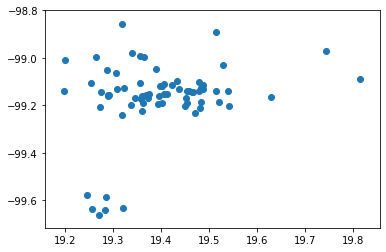

In [175]:
#
plt.scatter(dfG['lat'],dfG['lon'])
#
plt.show()

## Personas hospitalizadas por día por COVID-19 

In [129]:
dfH = pd.read_csv(h).sort_values('fecha', ascending=True)
dfH.head(3)

,fecha,año,mes,dia,hospitalizados_totales,hospitalizados_totales_cdmx,hospitalizados_totales_edomex,camas_intubados_totales,camas_intubados_cdmx,camas_intubados_edomex
0,2020-03-24,2020,marzo,24,50,50,0,39,39,0
29,2020-03-25,2020,marzo,25,105,105,0,33,33,0
30,2020-03-26,2020,marzo,26,128,128,0,42,42,0


In [136]:
dfH.dtypes

fecha                            object
año                               int64
mes                              object
dia                               int64
hospitalizados_totales            int64
hospitalizados_totales_cdmx       int64
hospitalizados_totales_edomex     int64
camas_intubados_totales           int64
camas_intubados_cdmx              int64
camas_intubados_edomex            int64
dtype: object

In [135]:
dfH.index

Int64Index([ 0, 29, 30, 31, 32,  1,  2,  3, 33,  4, 16, 17, 18,  5,  6,  7, 19,
            34,  8,  9, 10, 35, 36, 37, 38, 39, 40, 41, 42, 20, 43, 11, 12, 21,
            22, 13, 23, 44, 24, 14, 15, 25, 45, 26, 46, 27, 47, 28, 48],
           dtype='int64')

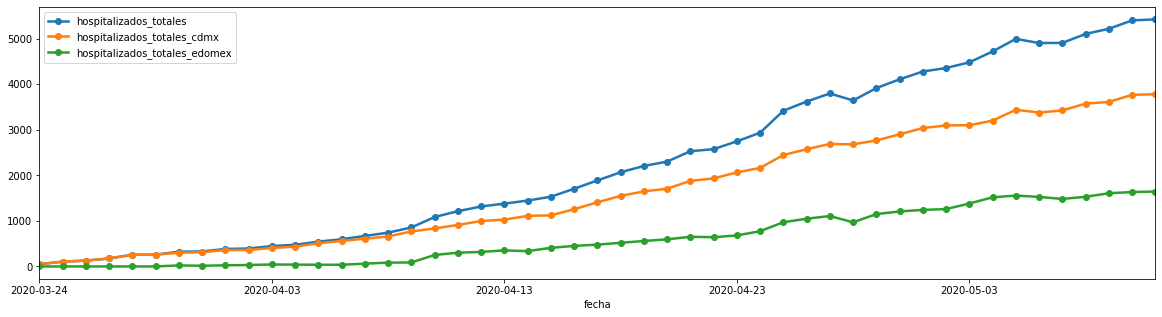

In [161]:
dfH.set_index('fecha')[['hospitalizados_totales', 
                        'hospitalizados_totales_cdmx',
                        'hospitalizados_totales_edomex']
                      ].plot(figsize=(20, 5),linewidth=2.5,legend=True,marker='o')

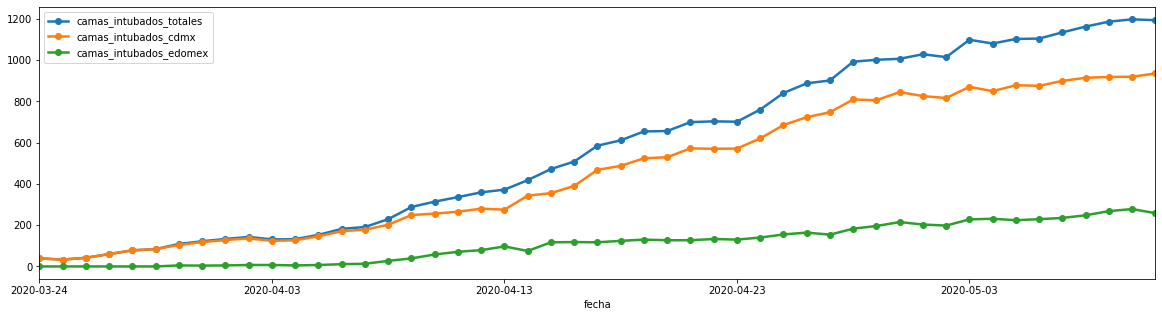

In [162]:
dfH.set_index('fecha')[['camas_intubados_totales', 
                        'camas_intubados_cdmx',
                        'camas_intubados_edomex']
                      ].plot(figsize=(20, 5),linewidth=2.5,legend=True,marker='o')

In [147]:
#plt.plot(dfH['fecha'], dfH[['hospitalizados_totales', 'hospitalizados_totales_cdmx','hospitalizados_totales_edomex']])

In [153]:
dfH.to_csv(PATH+'HospitalizadosCOVID.csv')

## Casos a nivel nacional asociados a covid-19 

In [4]:
i

'https://datos.cdmx.gob.mx/explore/dataset/casos-asociados-a-covid-19/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'

In [6]:
#dfI = pd.read_csv(i)#.sort_values('fecha', ascending=True)
#dfI.head(3)

In [ ]:
#dfI.dtypes, type(dfI), dfI.shape

In [ ]:
#dfD.to_csv(PATH+'COVID.csv')
#plt.plot(dfD['fecha'],dfD[[]])

## Hospitales y Centros de Salud 

In [149]:
j

'https://datos.cdmx.gob.mx/explore/dataset/hospitales-y-centros-de-salud/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'

In [150]:
#
dfJ = pd.read_csv(j)#.sort_values('fecha', ascending=True)
#
dfJ.head(3)

,Nombre,Titular,Latitud,Longitud,Coordenadas,Geopoint
0,Hospital General La Villa,Director: Dr. Enrique Garduño Salvador Direcci...,19.480774,-99.103371,"-99.103371,19.480774,0.000000","19.480774,-99.103371"
1,Hospital General Milpa Alta,Dirección: Dr.Benjamín Ortega Romero Dirección...,19.200199,-99.011253,"-99.011253,19.200199,0.000000","19.200199,-99.011253"
2,Hospital General Ticomán,Director: Dr. Carlos Vazquez Noriega Dirección...,19.514547,-99.138245,"-99.138245,19.514547,0.000000","19.514547,-99.138245"


In [151]:
#
dfJ.dtypes, type(dfJ), dfJ.shape

(Nombre          object
 Titular         object
 Latitud        float64
 Longitud       float64
 Coordenadas     object
 Geopoint        object
 dtype: object, pandas.core.frame.DataFrame, (27, 6))

In [152]:
dfJ.to_csv(PATH+'HospitalesyCSalud.csv')

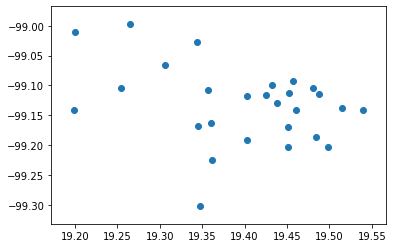

In [23]:
#
plt.scatter(dfJ['Latitud'],dfJ['Longitud'])
#
plt.show()

In [157]:
k = 'C:/Users/Francisco Sarabia/Downloads/Datasets/Hospitales-SEMOVI_csv.csv'
dfK = pd.read_csv(k, delimiter="|")
dfK.head(3)

,ID,Name,SECTOR,DIRECCIÓN,COLONIA,ALCALDIA,"Lat,Lon",Lat,Lon
0,H1,Centro de Salud México - España,Sector Público,Lago Iseo 128,Col Anáhuac I Secc.,alc. Miguel Hidalgo,"19.445945, -99.181903",19.445945,-99.181903
1,H1,Centro Médico Quirúrgico Escandón,Sector Privado,Progreso # 231,Col. Escandón,alc. Miguel Hidalgo,"19.402750, -99.172515",19.402750,-99.172515
2,H2,Centro Médico Siglo XXI,Sector Público,Eje 3 Sur y Eje 1 Pte,Col. Doctores,alc. Cuauhtémoc,"19.406922, -99.154821",19.406922,-99.154821


In [158]:
dfH.dtypes, type(dfH), dfH.shape

(fecha                            object
 año                               int64
 mes                              object
 dia                               int64
 hospitalizados_totales            int64
 hospitalizados_totales_cdmx       int64
 hospitalizados_totales_edomex     int64
 camas_intubados_totales           int64
 camas_intubados_cdmx              int64
 camas_intubados_edomex            int64
 dtype: object, pandas.core.frame.DataFrame, (49, 10))

In [ ]:
#dfK.to_csv(PATH+'HospitalesyCSalud.csv')

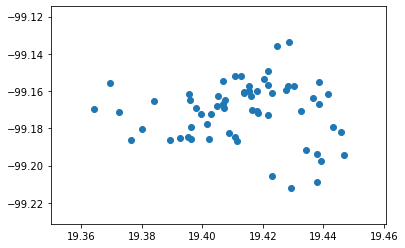

In [160]:
#
plt.scatter(dfK['Lat'],dfK['Lon'])
#
plt.show()